### Importing Required Packages

In [62]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

#### Importing the Data

In [64]:
raw_loan_data = pd.read_csv('loan.csv')
raw_loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [66]:
raw_loan_data.isna().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

#### Dropping the columns with no Data

In [68]:
raw_loan_data.dropna(axis = 1, how = 'all', inplace = True)
raw_loan_data.shape

(39717, 57)

#### Checking if any column is missing mrore than 65% of the data and dropping them

In [70]:
for col in raw_loan_data.columns:
    missing_values = round(raw_loan_data[col].isna().sum() / raw_loan_data.shape[0], 2)
    if missing_values >= 0.65:
        raw_loan_data.drop(col, axis = 1, inplace = True)
        
raw_loan_data.shape

(39717, 54)

#### Dropping the unwanted columns for the analysis

In [72]:
drop_cols = [
 'collection_recovery_fee',
 'delinq_2yrs',
 'desc',
 'earliest_cr_line',
 'emp_title',
 'id',
 'inq_last_6mths',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'member_id',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'recoveries',
 'revol_bal',
 'revol_util',
 'title',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'url',
 'zip_code'
]

raw_loan_data.drop(drop_cols, axis = 1, inplace = True)


In [74]:
raw_loan_data.shape

(39717, 27)

#### Cleansing Each of the column

In [86]:
# Removing the 'months' and Converting the term column to int type
raw_loan_data['term'] = raw_loan_data['term'].apply(lambda x: int(x.replace('months', '').strip()))

In [92]:
# Removing the '%' and Converting the int_rate column to float type
raw_loan_data['int_rate'] = raw_loan_data['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))

In [102]:
# Converting the column issue_d from string to DateTime
raw_loan_data['issue_d'] = pd.to_datetime(raw_loan_data['issue_d'], format = '%b-%y')

In [106]:
raw_loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,dti,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,27.65,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,1.00,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,...,8.72,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,...,20.00,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,...,17.94,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [114]:
raw_loan_data = raw_loan_data.reindex(sorted(raw_loan_data.columns), axis=1)
raw_loan_data

,acc_now_delinq,addr_state,annual_inc,application_type,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_amnt,dti,emp_length,funded_amnt,...,loan_amnt,loan_status,policy_code,pub_rec_bankruptcies,purpose,pymnt_plan,sub_grade,tax_liens,term,verification_status
0,0,AZ,24000.0,INDIVIDUAL,0.0,0.0,0,27.65,10+ years,5000,...,5000,Fully Paid,1,0.0,credit_card,n,B2,0.0,36,Verified
1,0,GA,30000.0,INDIVIDUAL,0.0,0.0,0,1.00,< 1 year,2500,...,2500,Charged Off,1,0.0,car,n,C4,0.0,60,Source Verified
2,0,IL,12252.0,INDIVIDUAL,0.0,0.0,0,8.72,10+ years,2400,...,2400,Fully Paid,1,0.0,small_business,n,C5,0.0,36,Not Verified
3,0,CA,49200.0,INDIVIDUAL,0.0,0.0,0,20.00,10+ years,10000,...,10000,Fully Paid,1,0.0,other,n,C1,0.0,36,Source Verified
4,0,OR,80000.0,INDIVIDUAL,0.0,0.0,0,17.94,1 year,3000,...,3000,Current,1,0.0,other,n,B5,0.0,60,Source Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,0,CO,110000.0,INDIVIDUAL,NaN,NaN,0,11.33,4 years,2500,...,2500,Fully Paid,1,NaN,home_improvement,n,A4,NaN,36,Not Verified
39713,0,NC,18000.0,INDIVIDUAL,NaN,NaN,0,6.40,3 years,8500,...,8500,Fully Paid,1,NaN,credit_card,n,C1,NaN,36,Not Verified
39714,0,MA,100000.0,INDIVIDUAL,NaN,NaN,0,2.30,< 1 year,5000,...,5000,Fully Paid,1,NaN,debt_consolidation,n,A4,NaN,36,Not Verified
39715,0,MD,200000.0,INDIVIDUAL,NaN,NaN,0,3.72,< 1 year,5000,...,5000,Fully Paid,1,NaN,other,n,A2,NaN,36,Not Verified


In [116]:
raw_loan_data = raw_loan_data[raw_loan_data['loan_status'].str.lower() != "current"]
raw_loan_data

,acc_now_delinq,addr_state,annual_inc,application_type,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_amnt,dti,emp_length,funded_amnt,...,loan_amnt,loan_status,policy_code,pub_rec_bankruptcies,purpose,pymnt_plan,sub_grade,tax_liens,term,verification_status
0,0,AZ,24000.0,INDIVIDUAL,0.0,0.0,0,27.65,10+ years,5000,...,5000,Fully Paid,1,0.0,credit_card,n,B2,0.0,36,Verified
1,0,GA,30000.0,INDIVIDUAL,0.0,0.0,0,1.00,< 1 year,2500,...,2500,Charged Off,1,0.0,car,n,C4,0.0,60,Source Verified
2,0,IL,12252.0,INDIVIDUAL,0.0,0.0,0,8.72,10+ years,2400,...,2400,Fully Paid,1,0.0,small_business,n,C5,0.0,36,Not Verified
3,0,CA,49200.0,INDIVIDUAL,0.0,0.0,0,20.00,10+ years,10000,...,10000,Fully Paid,1,0.0,other,n,C1,0.0,36,Source Verified
5,0,AZ,36000.0,INDIVIDUAL,0.0,0.0,0,11.20,3 years,5000,...,5000,Fully Paid,1,0.0,wedding,n,A4,0.0,36,Source Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,0,CO,110000.0,INDIVIDUAL,NaN,NaN,0,11.33,4 years,2500,...,2500,Fully Paid,1,NaN,home_improvement,n,A4,NaN,36,Not Verified
39713,0,NC,18000.0,INDIVIDUAL,NaN,NaN,0,6.40,3 years,8500,...,8500,Fully Paid,1,NaN,credit_card,n,C1,NaN,36,Not Verified
39714,0,MA,100000.0,INDIVIDUAL,NaN,NaN,0,2.30,< 1 year,5000,...,5000,Fully Paid,1,NaN,debt_consolidation,n,A4,NaN,36,Not Verified
39715,0,MD,200000.0,INDIVIDUAL,NaN,NaN,0,3.72,< 1 year,5000,...,5000,Fully Paid,1,NaN,other,n,A2,NaN,36,Not Verified


In [118]:
loan_df = raw_loan_data.astype({
    'dti': 'float',
    'funded_amnt' : 'float',
    'funded_amnt_inv' : 'float',
    'loan_amnt' : 'float'
})

#### Box Plot Analysis to find outliters

In [127]:
def calculate_boxplot_stats(df: pd.DataFrame, column: str, iqr_multiplier: float = 1.5) -> dict:
    quartile1 = df[column].quantile(0.25)
    quartile3 = df[column].quantile(0.75)
    iqr = quartile3 - quartile1
    lower_bound = quartile1 - iqr_multiplier * iqr
    upper_bound = quartile3 + iqr_multiplier * iqr
    return {
        'iqr': iqr,
        'quartile1': quartile1,
        'quartile3': quartile3,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

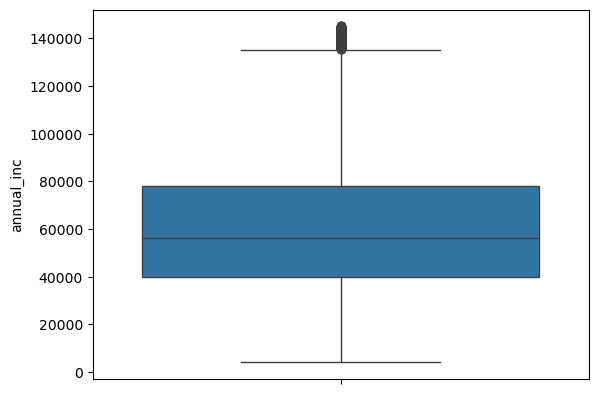

In [129]:
is_annual_inc_lb = calculate_boxplot_stats(loan_df, 'annual_inc')['lower_bound']
is_annual_inc_ub = calculate_boxplot_stats(loan_df, 'annual_inc')['upper_bound']
is_annual_inc_lt = loan_df.annual_inc > is_annual_inc_lb
is_annual_inc_gt = loan_df.annual_inc < is_annual_inc_ub

req_income = is_annual_inc_lt & is_annual_inc_gt

loan_df = loan_df[req_income]

sns.boxplot(y=loan_df.annual_inc)
plt.show()

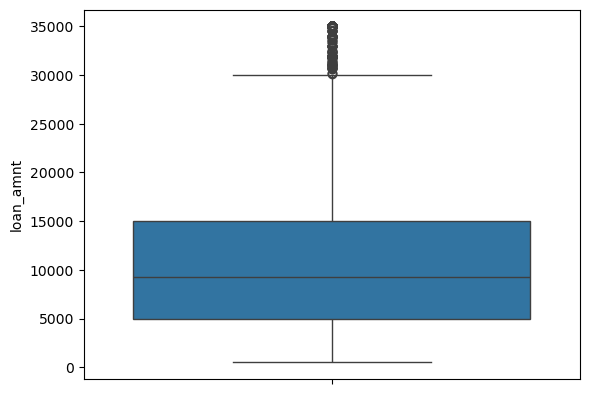

In [131]:
sns.boxplot(y=loan_df.loan_amnt)
plt.show()

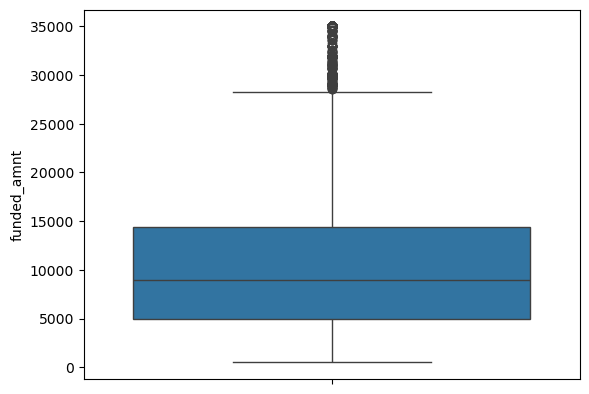

In [133]:
sns.boxplot(y=loan_df.funded_amnt)
plt.show()

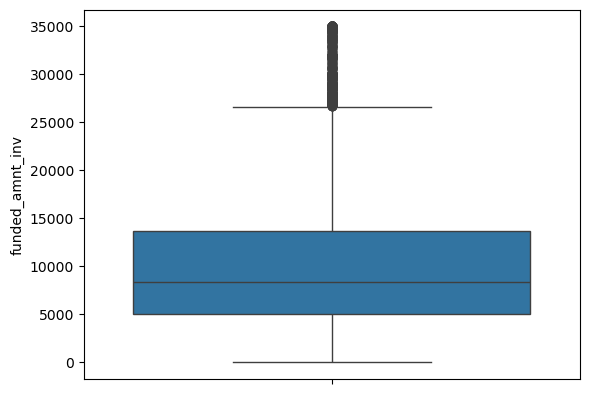

In [135]:
sns.boxplot(y=loan_df.funded_amnt_inv)
plt.show()

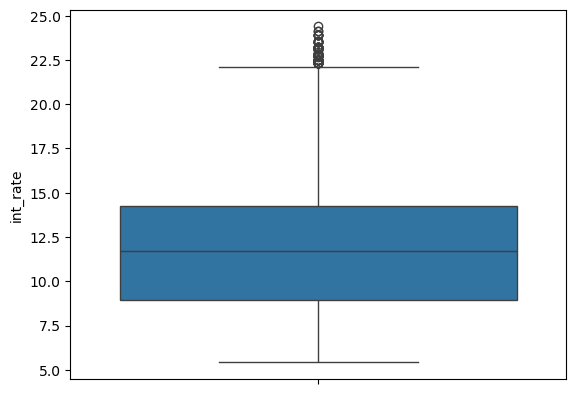

In [137]:
sns.boxplot(y=loan_df.int_rate)
plt.show()

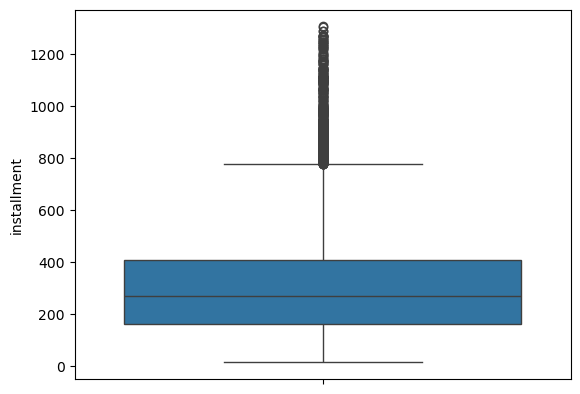

In [139]:
sns.boxplot(y=loan_df.installment)
plt.show()

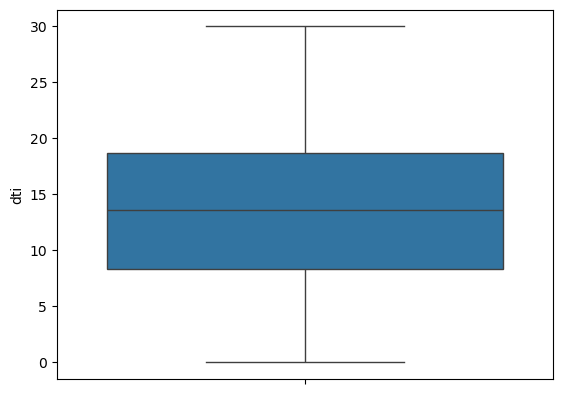

In [141]:
sns.boxplot(y=loan_df.dti)
plt.show()

#### Imputing values in Columns

In [144]:
loan_df.emp_length.isna().sum()

1015

In [146]:
# Annual income of loan applicants whose employment length is missing
loan_df[loan_df.emp_length.isna()]['annual_inc'].describe()

count      1015.000000
mean      42537.019271
std       24044.887728
min        4200.000000
25%       24468.000000
50%       37404.000000
75%       55780.000000
max      144000.000000
Name: annual_inc, dtype: float64

In [148]:
# Find the most frequent value of employment length
loan_df.emp_length.value_counts()

emp_length
10+ years    7923
< 1 year     4338
2 years      4112
3 years      3832
4 years      3206
1 year       3052
5 years      3051
6 years      2078
7 years      1646
8 years      1347
9 years      1154
Name: count, dtype: int64

In [150]:
loan_df.emp_length.mode()

0    10+ years
Name: emp_length, dtype: object

In [152]:
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True)

In [154]:
# Verify if the imputation of values is successful
loan_df.emp_length.isna().sum()

0

In [156]:
emp_length_mapping: dict = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
    '8 years': 8, '9 years': 9, '10+ years': 10
}

# Use the map function to replace values in the 'emp_length' column
loan_df['emp_length'] = loan_df['emp_length'].map(emp_length_mapping)

In [158]:
loan_df.home_ownership.value_counts()

home_ownership
RENT        18050
MORTGAGE    15750
OWN          2858
OTHER          93
NONE            3
Name: count, dtype: int64

#### Imputing NONE values as OTHER for home_ownership

In [160]:
loan_df['home_ownership'].replace('NONE', 'OTHER', inplace = True)

In [162]:
loan_df.home_ownership.value_counts()

home_ownership
RENT        18050
MORTGAGE    15750
OWN          2858
OTHER          96
Name: count, dtype: int64

In [164]:
loan_df.verification_status.value_counts()

verification_status
Not Verified       16306
Verified           11269
Source Verified     9179
Name: count, dtype: int64

In [169]:
##Replacing the 'Source Verified' values as 'Verified' since both values mean the same thing i.e. the loan applicant has some source of income which is verified
loan_df['verification_status'].replace('Source Verified', 'Verified', inplace = True)

In [171]:
loan_df.verification_status.value_counts()

verification_status
Verified        20448
Not Verified    16306
Name: count, dtype: int64

In [173]:
loan_df.pub_rec_bankruptcies.isna().sum()

660

In [175]:
loan_df[loan_df.pub_rec_bankruptcies.isna()]

,acc_now_delinq,addr_state,annual_inc,application_type,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_amnt,dti,emp_length,funded_amnt,...,loan_amnt,loan_status,policy_code,pub_rec_bankruptcies,purpose,pymnt_plan,sub_grade,tax_liens,term,verification_status
35006,0,NY,110000.0,INDIVIDUAL,0.0,0.0,0,7.07,0,15000.0,...,15000.0,Fully Paid,1,NaN,credit_card,n,A5,0.0,36,Not Verified
35058,0,TX,80800.0,INDIVIDUAL,0.0,0.0,0,14.97,3,3000.0,...,3000.0,Fully Paid,1,NaN,credit_card,n,C5,0.0,36,Not Verified
35362,0,MI,60000.0,INDIVIDUAL,0.0,0.0,0,11.08,0,4000.0,...,4000.0,Charged Off,1,NaN,car,n,B1,0.0,36,Not Verified
38443,0,NJ,37152.0,INDIVIDUAL,0.0,0.0,0,2.26,10,2300.0,...,2300.0,Fully Paid,1,NaN,moving,n,D2,0.0,36,Verified
38717,0,OH,75000.0,INDIVIDUAL,0.0,0.0,0,16.08,0,6000.0,...,6000.0,Fully Paid,1,NaN,other,n,A3,0.0,36,Not Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,0,CO,75000.0,INDIVIDUAL,NaN,NaN,0,15.55,5,5000.0,...,5000.0,Fully Paid,1,NaN,credit_card,n,B1,NaN,36,Not Verified
39712,0,CO,110000.0,INDIVIDUAL,NaN,NaN,0,11.33,4,2500.0,...,2500.0,Fully Paid,1,NaN,home_improvement,n,A4,NaN,36,Not Verified
39713,0,NC,18000.0,INDIVIDUAL,NaN,NaN,0,6.40,3,8500.0,...,8500.0,Fully Paid,1,NaN,credit_card,n,C1,NaN,36,Not Verified
39714,0,MA,100000.0,INDIVIDUAL,NaN,NaN,0,2.30,0,5000.0,...,5000.0,Fully Paid,1,NaN,debt_consolidation,n,A4,NaN,36,Not Verified


In [177]:
### Dropping the null values
loan_df = loan_df[loan_df.pub_rec_bankruptcies.notna()]

In [183]:
##Checking if any null values present
loan_df.isna().sum()

acc_now_delinq                0
addr_state                    0
annual_inc                    0
application_type              0
chargeoff_within_12_mths      2
collections_12_mths_ex_med    2
delinq_amnt                   0
dti                           0
emp_length                    0
funded_amnt                   0
funded_amnt_inv               0
grade                         0
home_ownership                0
initial_list_status           0
installment                   0
int_rate                      0
issue_d                       0
loan_amnt                     0
loan_status                   0
policy_code                   0
pub_rec_bankruptcies          0
purpose                       0
pymnt_plan                    0
sub_grade                     0
tax_liens                     0
term                          0
verification_status           0
dtype: int64

## Starting the Analysis

In [190]:
def bucket_data(column, thresholds, labels) -> str:
    for i, threshold in enumerate(thresholds):
        if column < threshold:
            return labels[i]
    return labels[-1]

In [192]:
# Extracting Month and Year for analysis from issue_d
loan_df['issue_m'] = pd.DatetimeIndex(loan_df['issue_d']).month
loan_df['issue_y'] = pd.DatetimeIndex(loan_df['issue_d']).year

# Categorising Months into quaterly buckets
threshold_months = [4, 7, 9]
quarter_labels = ['Q1', 'Q2', 'Q3', 'Q4']
loan_df['issue_q'] = loan_df['issue_m'].apply(bucket_data, args=(threshold_months, quarter_labels))

#### Categorising and bucketing the data for easier analysis

In [206]:
##Create new column loan_paid with 'Yes' and 'No' values based on loan_status column where 'Yes' = "Fully Paid" and 'No' = "Charged off"
loan_status_map = {'Charged Off': 'No', 'Fully Paid': 'Yes' }
loan_df['loan_paid'] = loan_df['loan_status'].map(loan_status_map)

In [198]:
# Categorising Loan Amount
loan_amount_thresholds = [5000, 10000, 15000]
loan_amount_labels = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
loan_df['loan_amnt_bucket'] = loan_df['loan_amnt'].apply(bucket_data, args=(loan_amount_thresholds, loan_amount_labels))

In [200]:
# Bucketting for int_rate
int_rate_bins = [5, 9, 13, 17, 21]
int_rate_labels = ['0%-5%', '5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']
loan_df['int_rate_bucket'] = loan_df['int_rate'].apply(bucket_data, args=((int_rate_bins, int_rate_labels)))

In [202]:
# Bucketting Annual Income
annual_inc_thresholds = [40000, 50000, 60000, 70000, 80000]
annual_inc_labels = ['0 - 40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - above']
loan_df['annual_inc_bucket'] = loan_df['annual_inc'].apply(bucket_data, args=(annual_inc_thresholds, annual_inc_labels))

In [204]:
# Bucketting Funded Amount
funded_amnt_thresholds = [5000, 10000, 15000]
funded_amnt_labels = ['0 - 5k', '5k - 10k', '10k - 15k', '15k - above']
loan_df['funded_amnt_bucket'] = loan_df['funded_amnt'].apply(bucket_data, args=(funded_amnt_thresholds, funded_amnt_labels))

In [209]:
# Bucketting DTI
dti_thresholds = [8, 12, 16, 20]
dti_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
loan_df['dti_bucket'] = loan_df['dti'].apply(bucket_data, args=(dti_thresholds, dti_labels))

#### Preparing to plot the Barplots

In [212]:
def plot_bar_graph(dataframe, x_column, y_column=None, hue_column=None, title=None, xlabel=None, ylabel=None, figsize=(10, 6), x_tick_rotation=90, freq_rotation=0, filter_column=None, filter_value=None):
    
    # Apply the filter if filter_column and filter_value are provided
    if filter_column and filter_value is not None:
        filtered_dataframe = dataframe[dataframe[filter_column] == filter_value]
    else:
        filtered_dataframe = dataframe

    # Set the style
    sns.set(style="whitegrid")

    # Create the bar plot
    plt.figure(figsize=figsize)
    
    if y_column:
        y_data = filtered_dataframe[y_column].value_counts()
        x_data = y_data.index
        sns.barplot(x=x_data, y=y_data.values, hue=hue_column)
    else:
        sns.barplot(data=filtered_dataframe, x=x_column, hue=hue_column)

    # Display frequency on top of the bars with rotation
    if y_column:
        for p in plt.gca().patches:
            plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', rotation=freq_rotation)

    # Set title and labels
    if title:
        plt.title(title, fontsize=14)
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    # Rotate x-axis labels
    plt.xticks(rotation=x_tick_rotation)

    # Show the plot
    plt.show()

##### Categorical Data

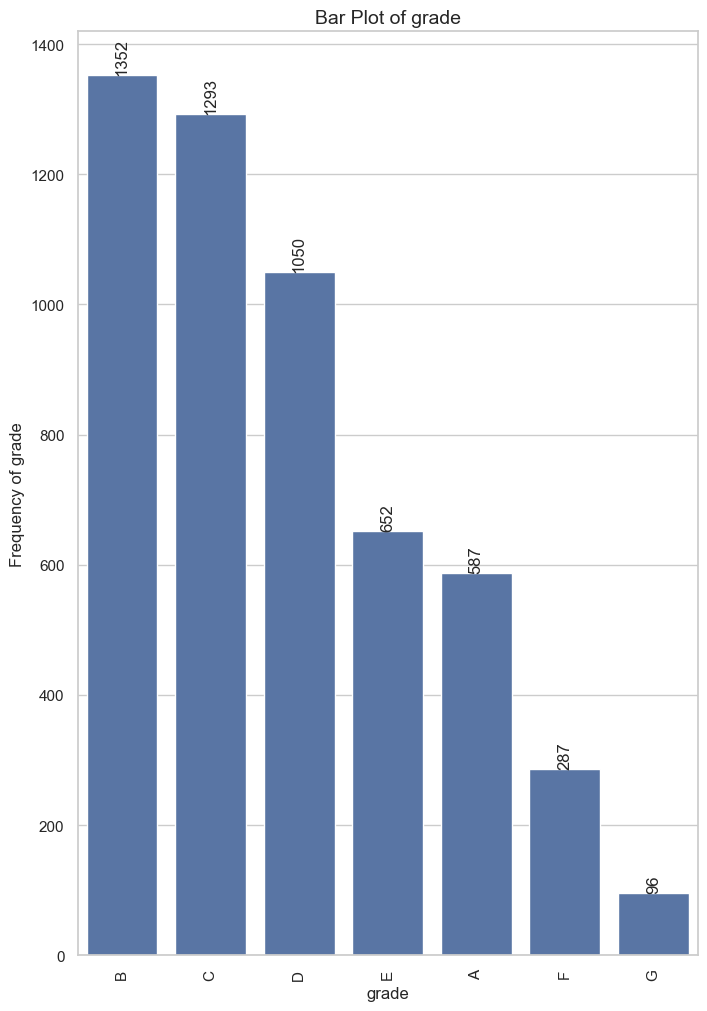

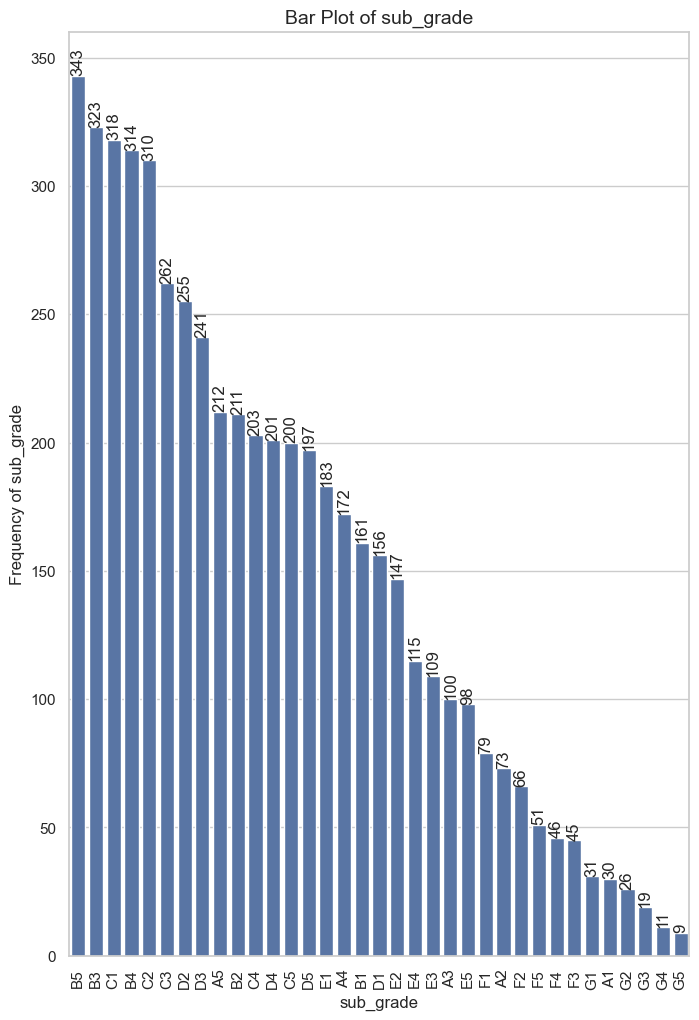

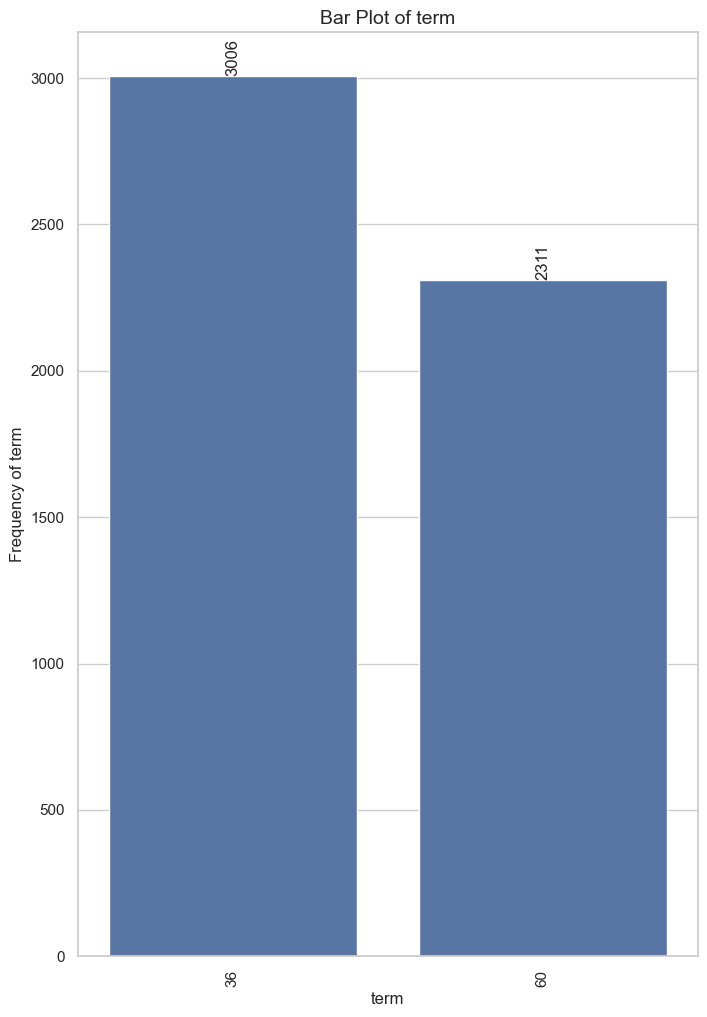

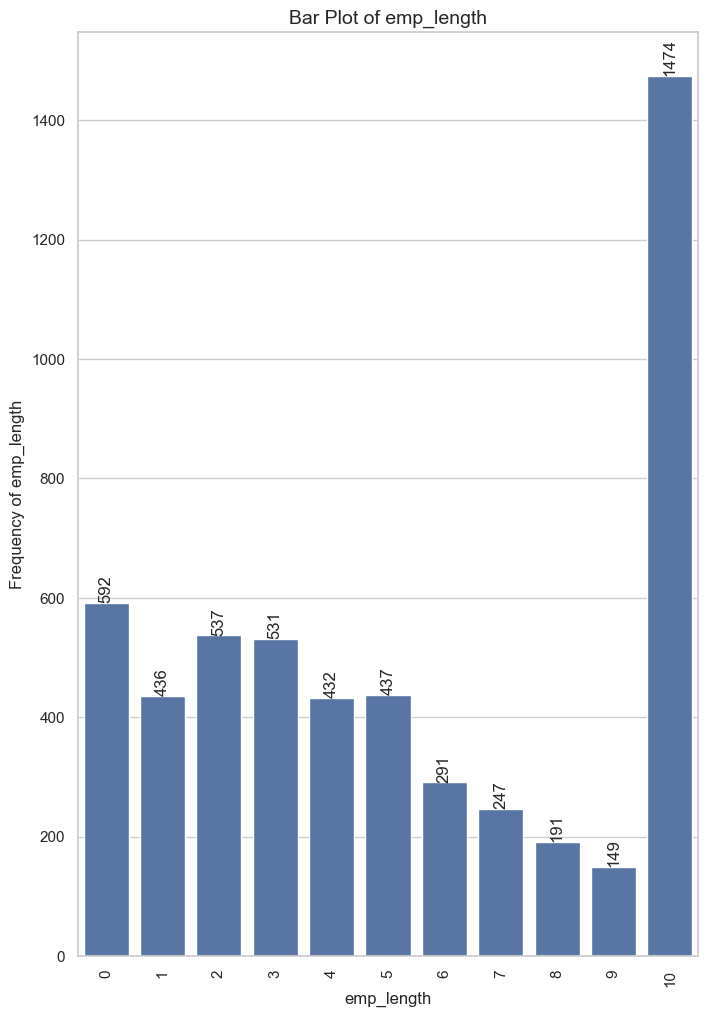

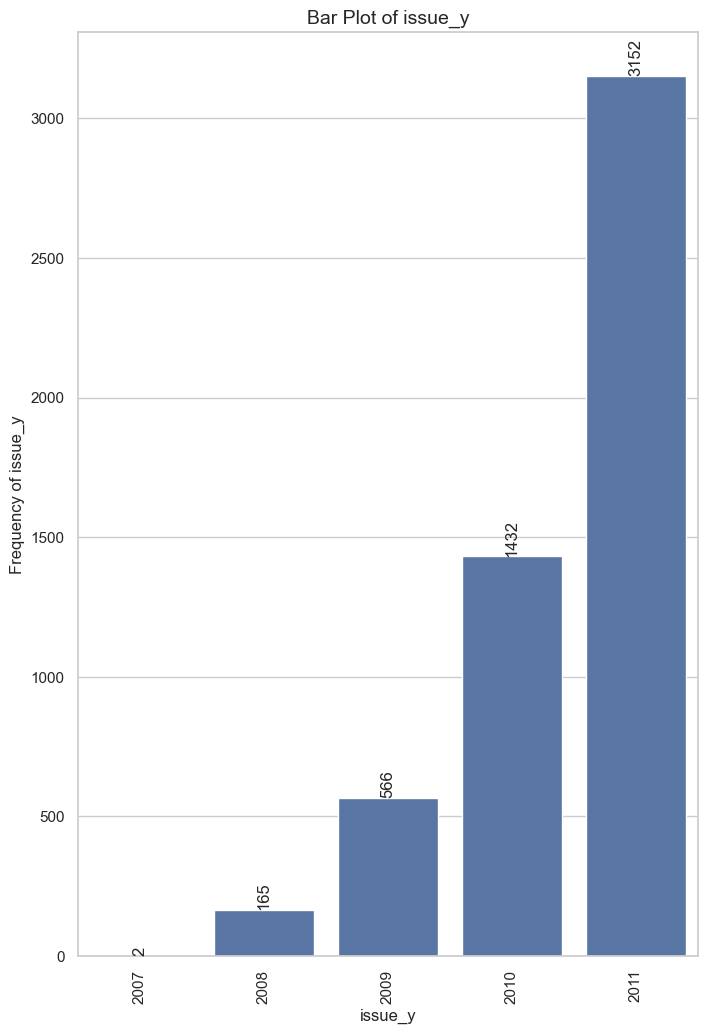

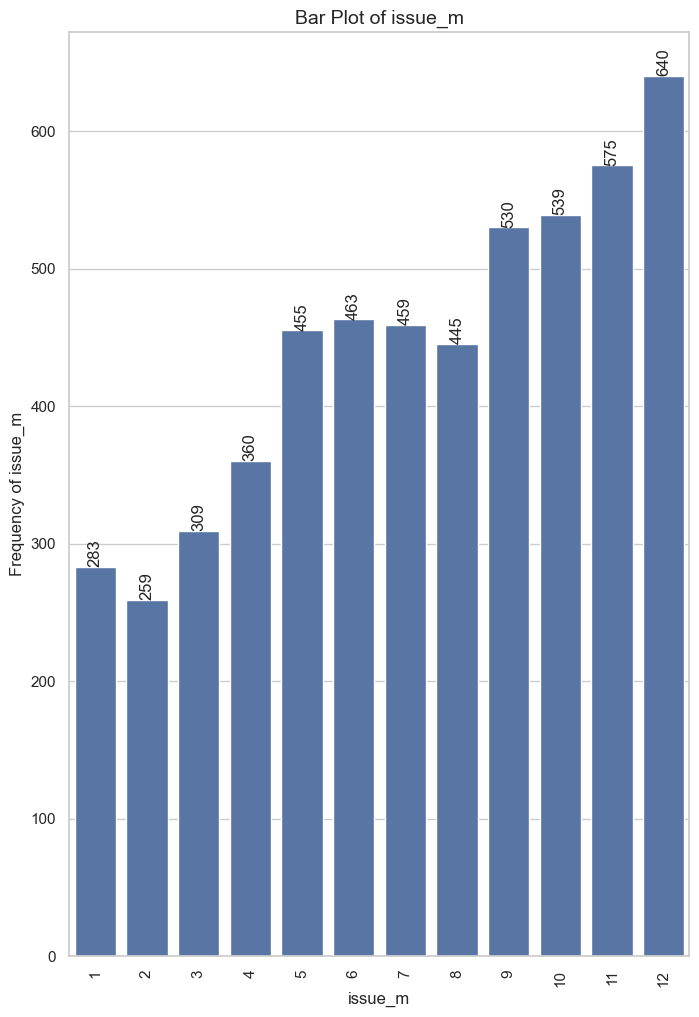

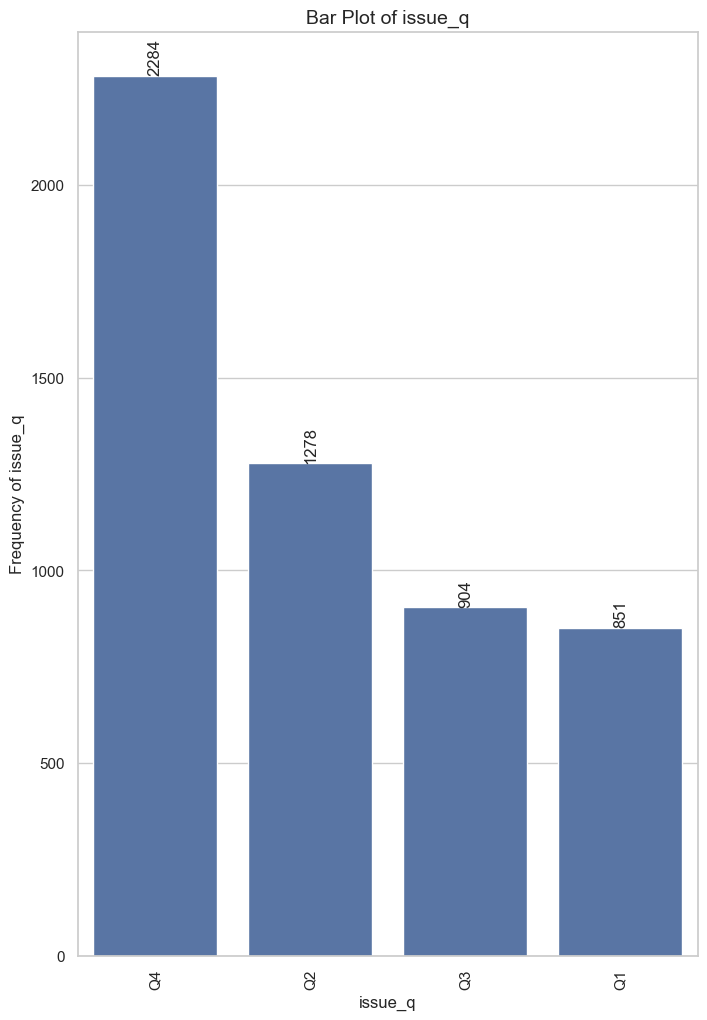

In [214]:
for cat_var in ['grade', 'sub_grade', 'term', 'emp_length', 'issue_y', 'issue_m', 'issue_q']:
    plot_bar_graph(
        loan_df,
        x_column = cat_var,
        y_column = cat_var,
        title = f'Bar Plot of {cat_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {cat_var}',
        figsize=(8, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

##### Unordered Categorical Data

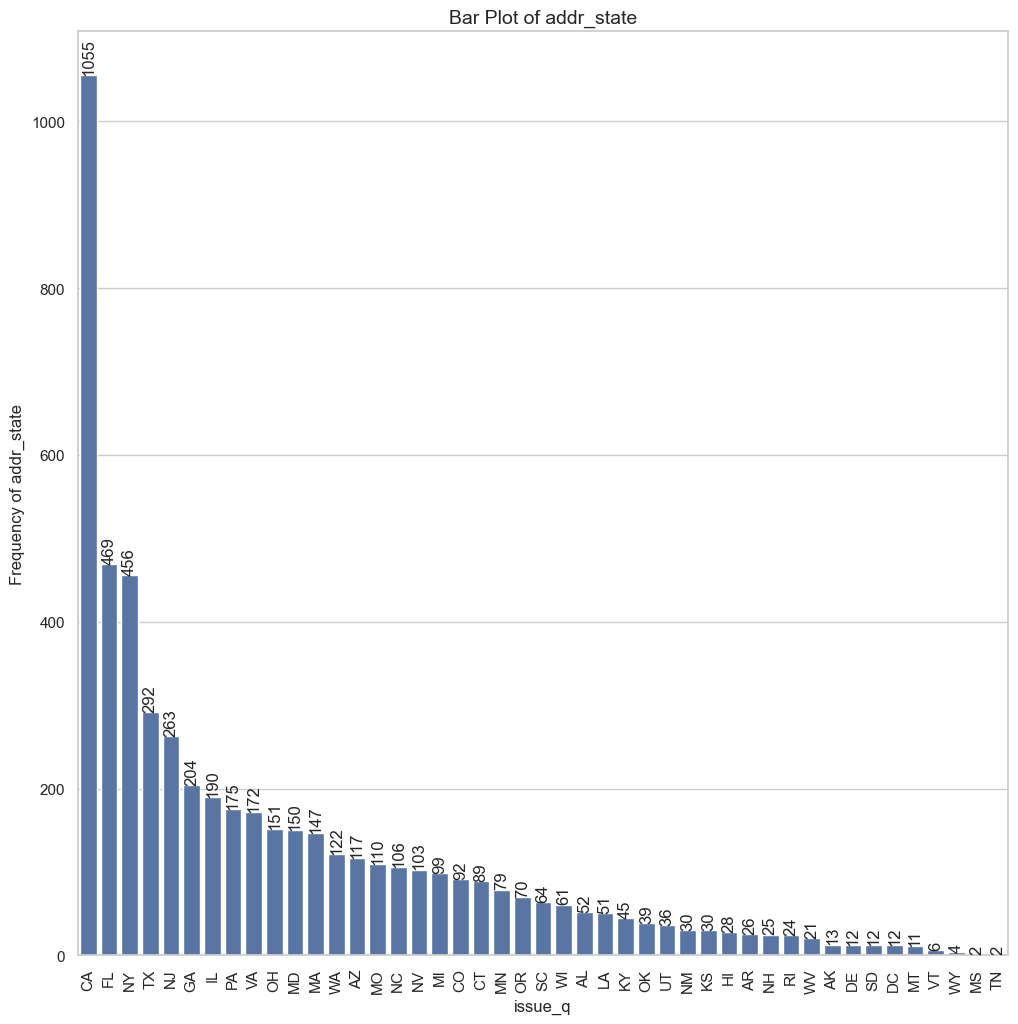

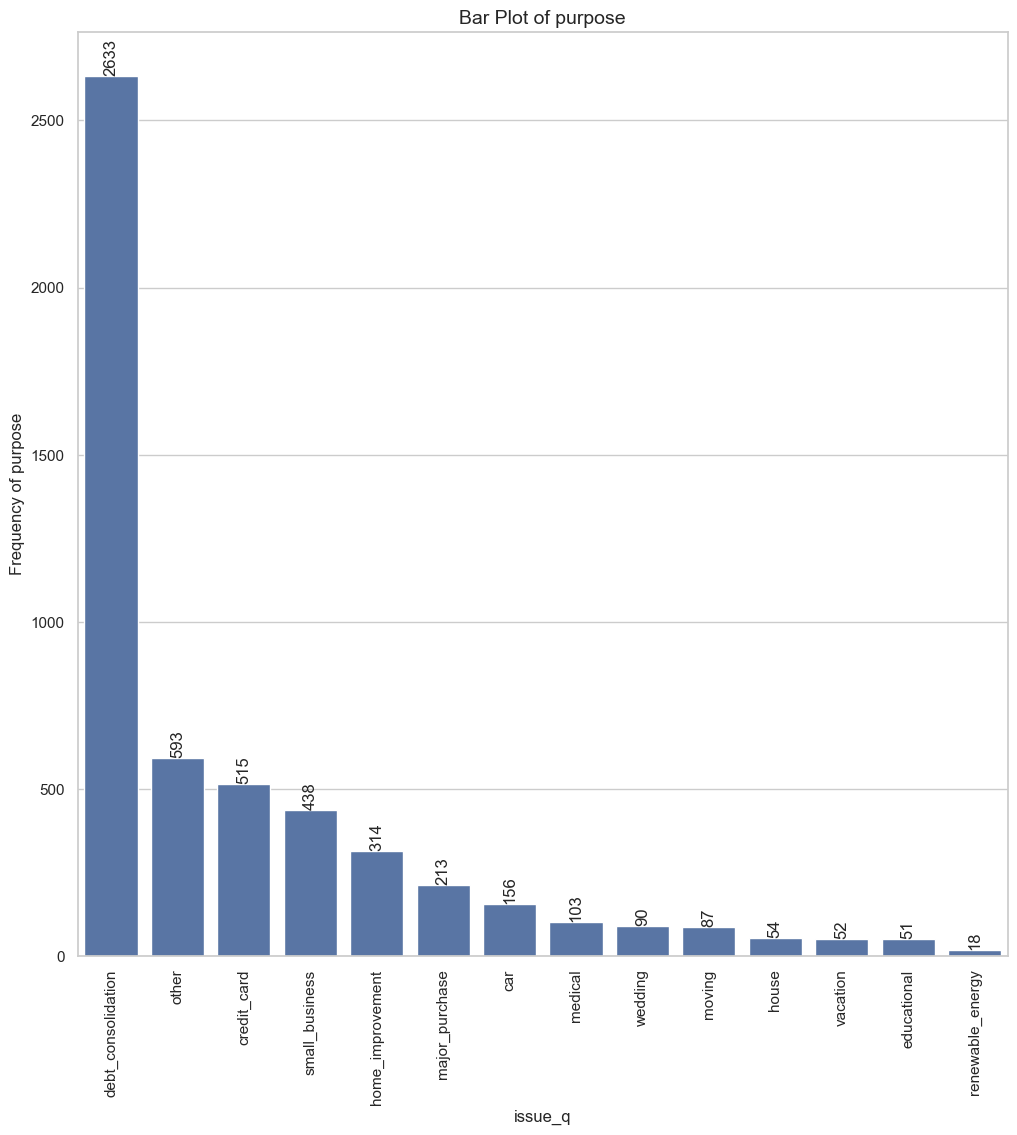

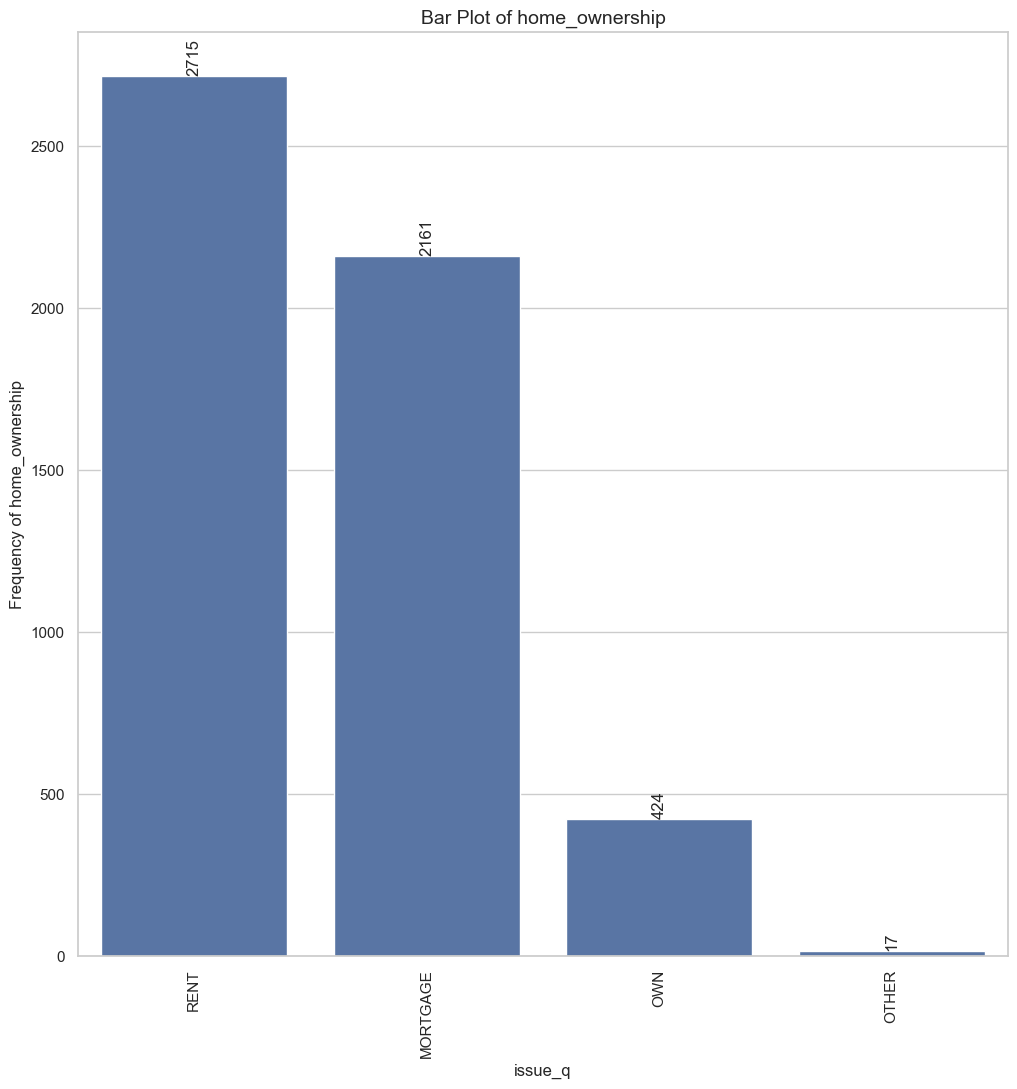

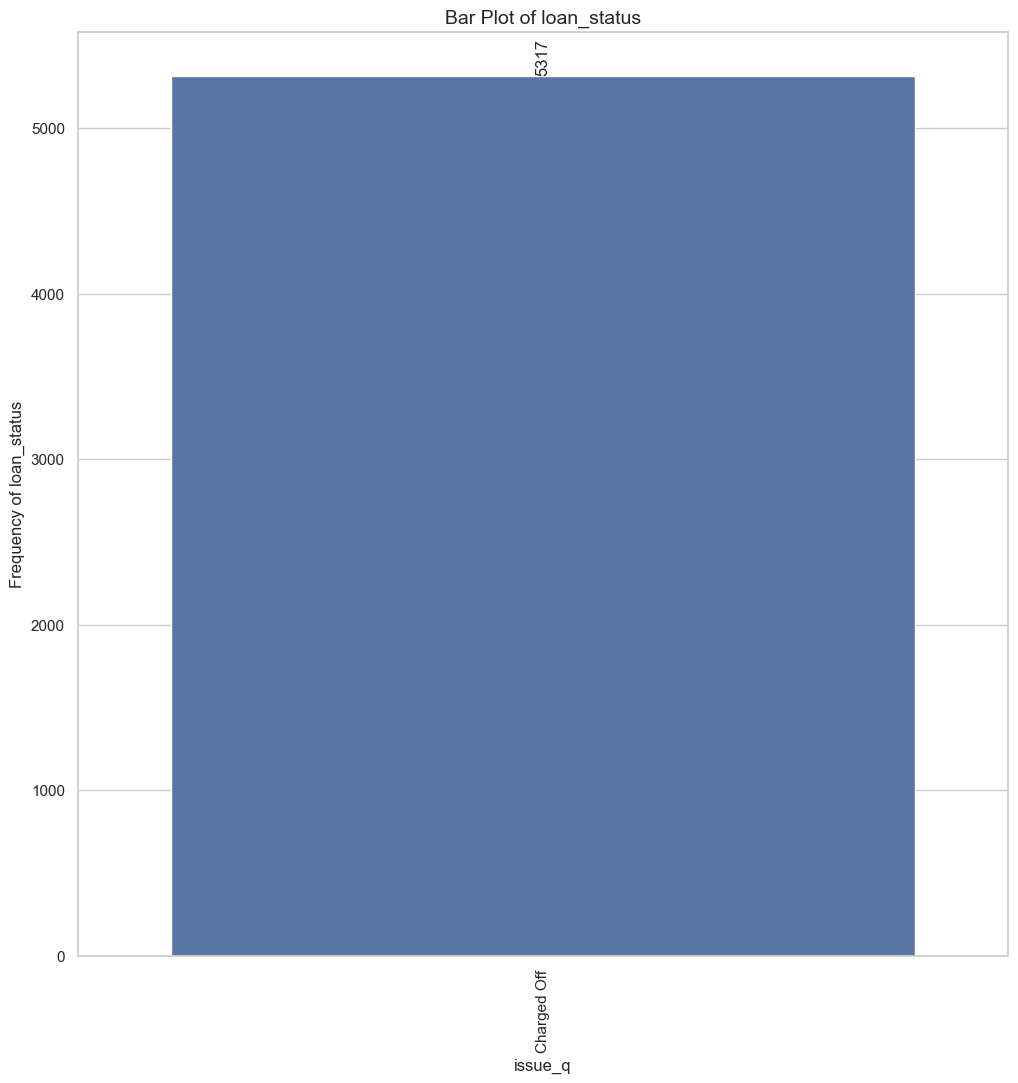

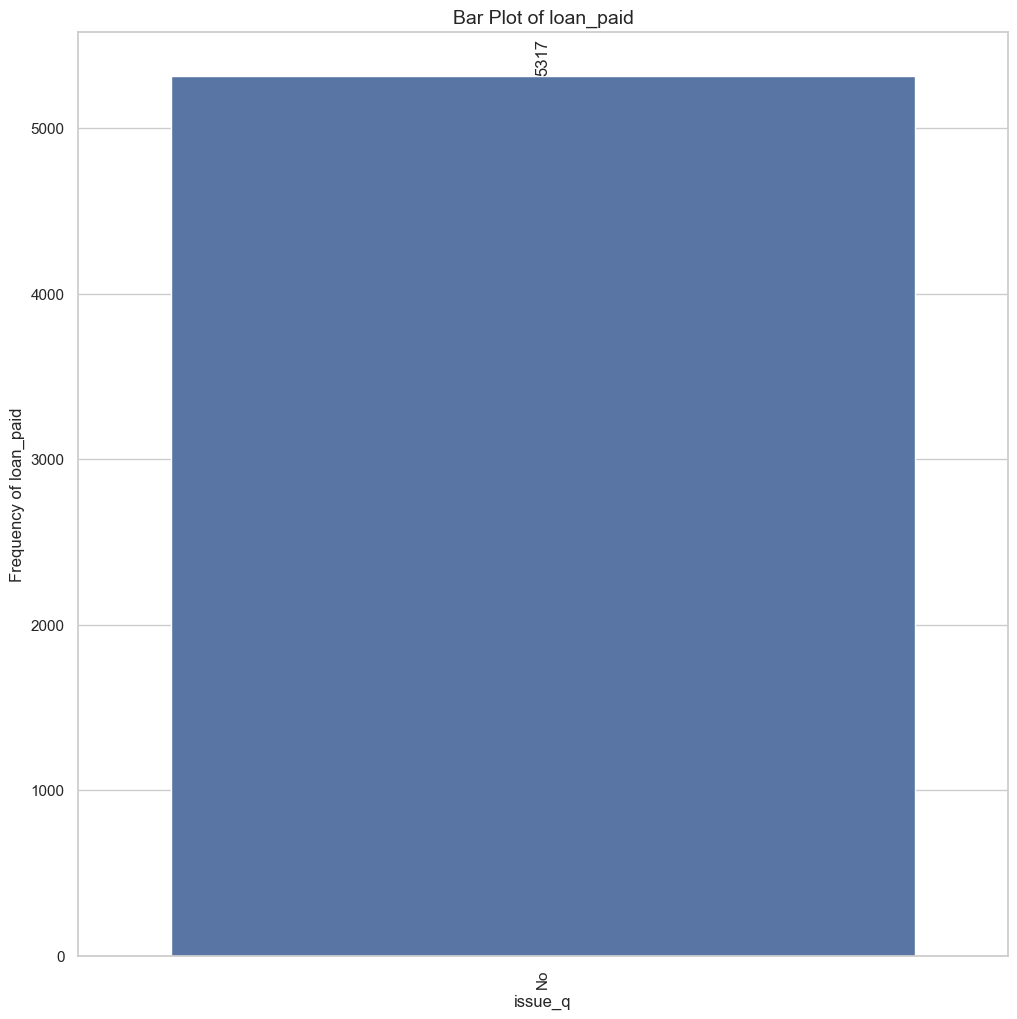

In [220]:
for un_cat_var in ['addr_state', 'purpose', 'home_ownership', 'loan_status', 'loan_paid']:
    plot_bar_graph(
        loan_df,
        x_column = un_cat_var,
        y_column = un_cat_var,
        title = f'Bar Plot of {un_cat_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {un_cat_var}',
        figsize=(12, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

##### Quantitative variables

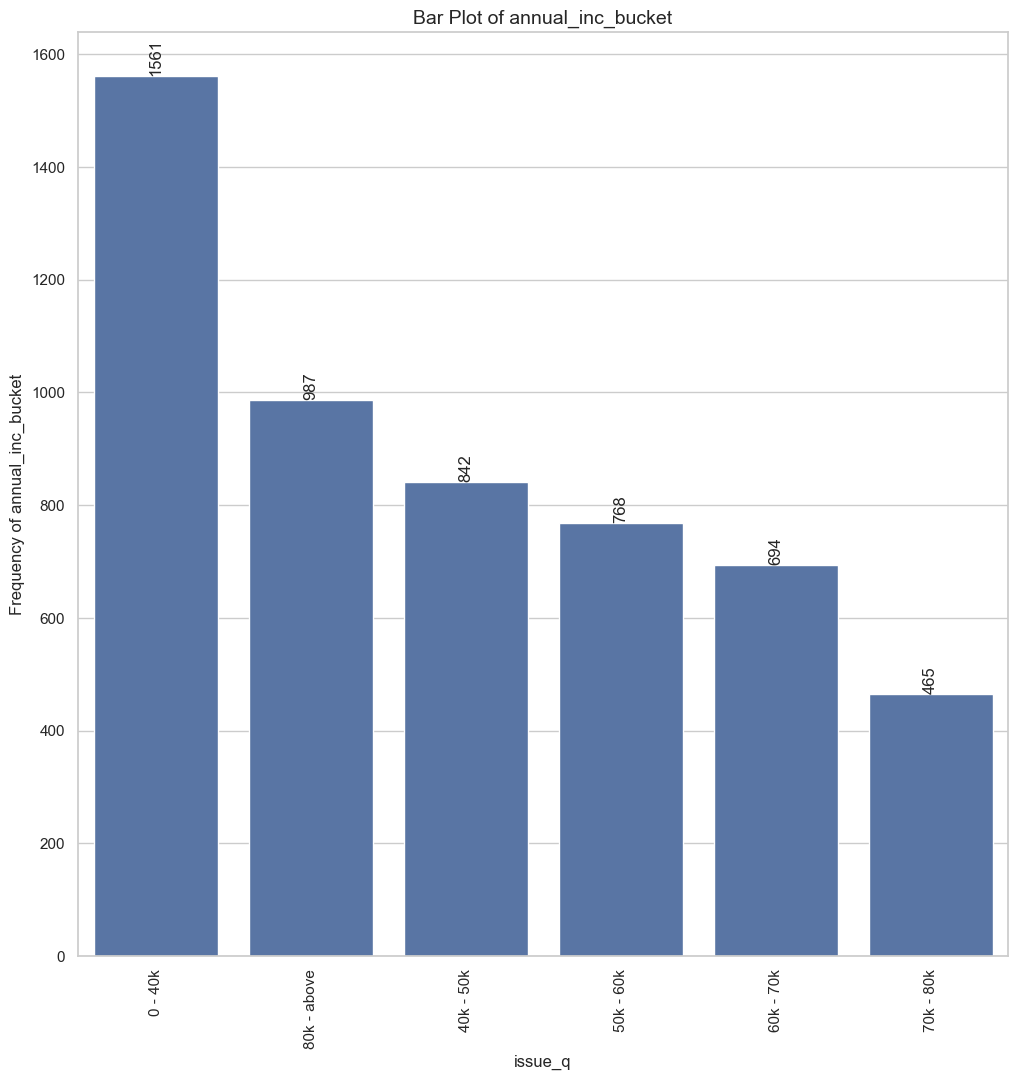

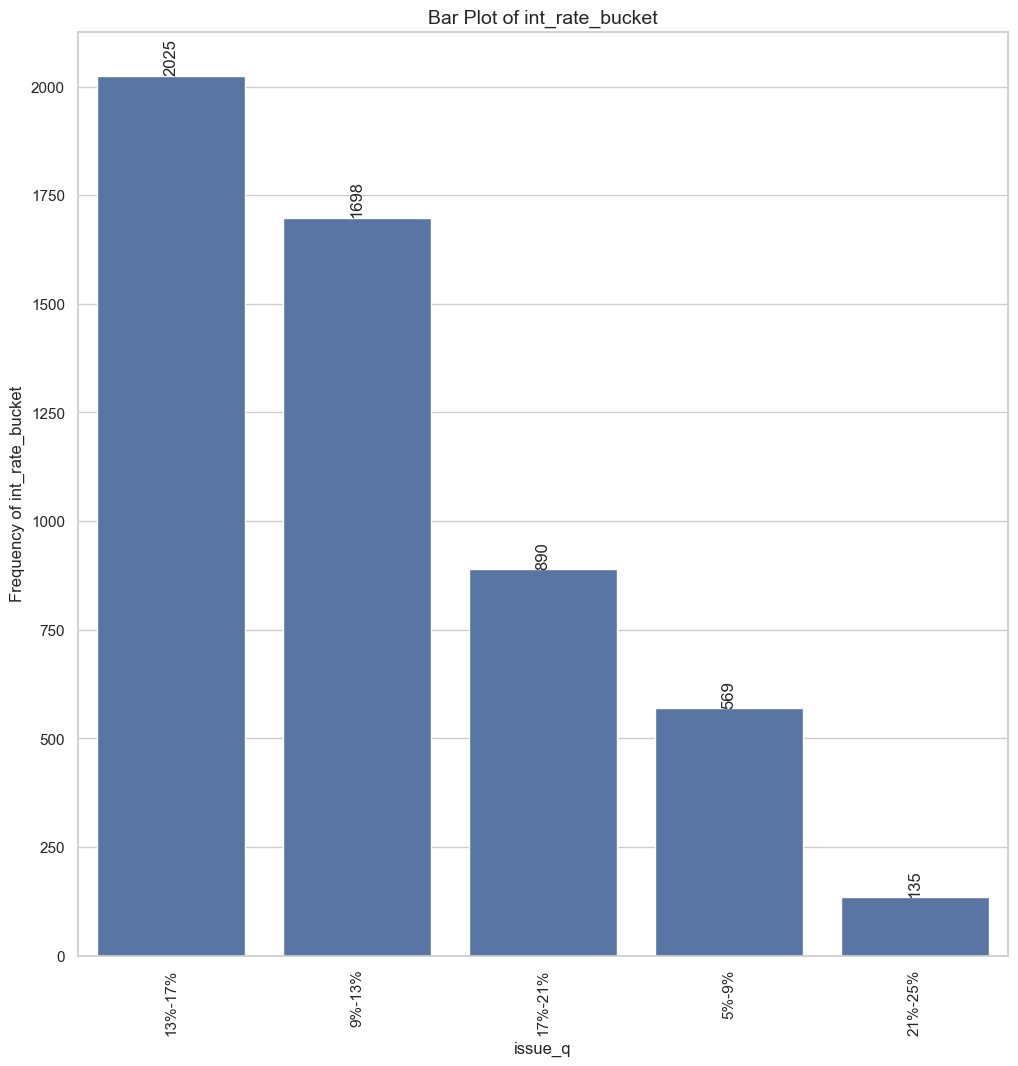

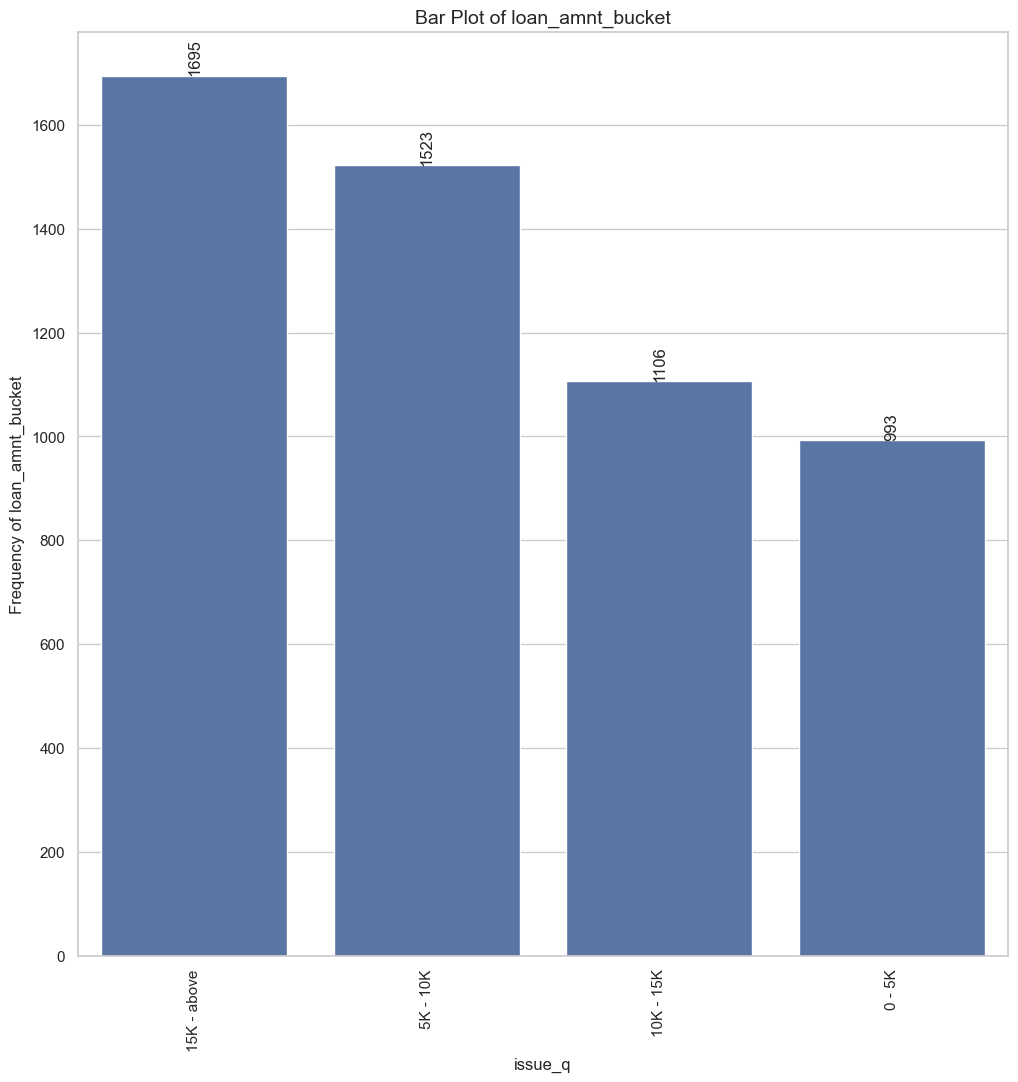

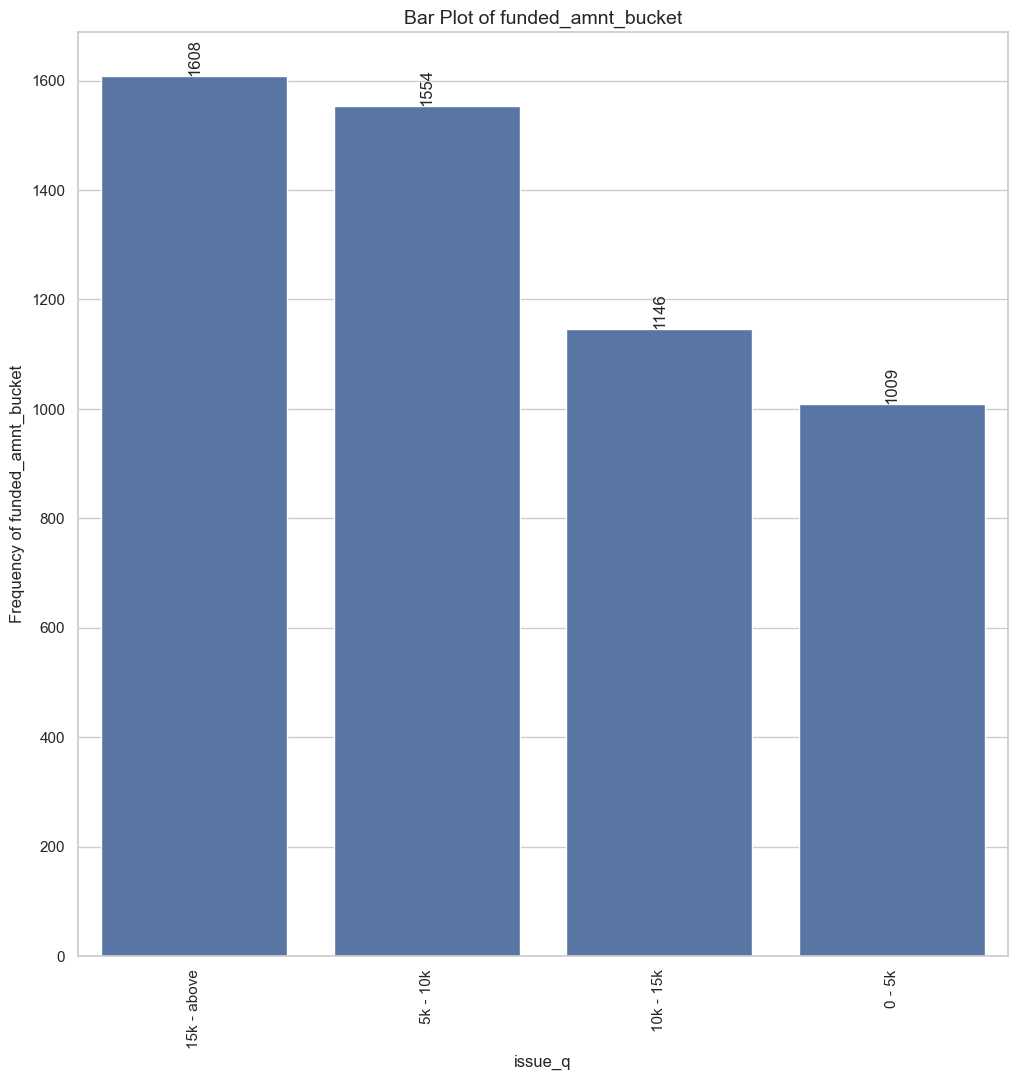

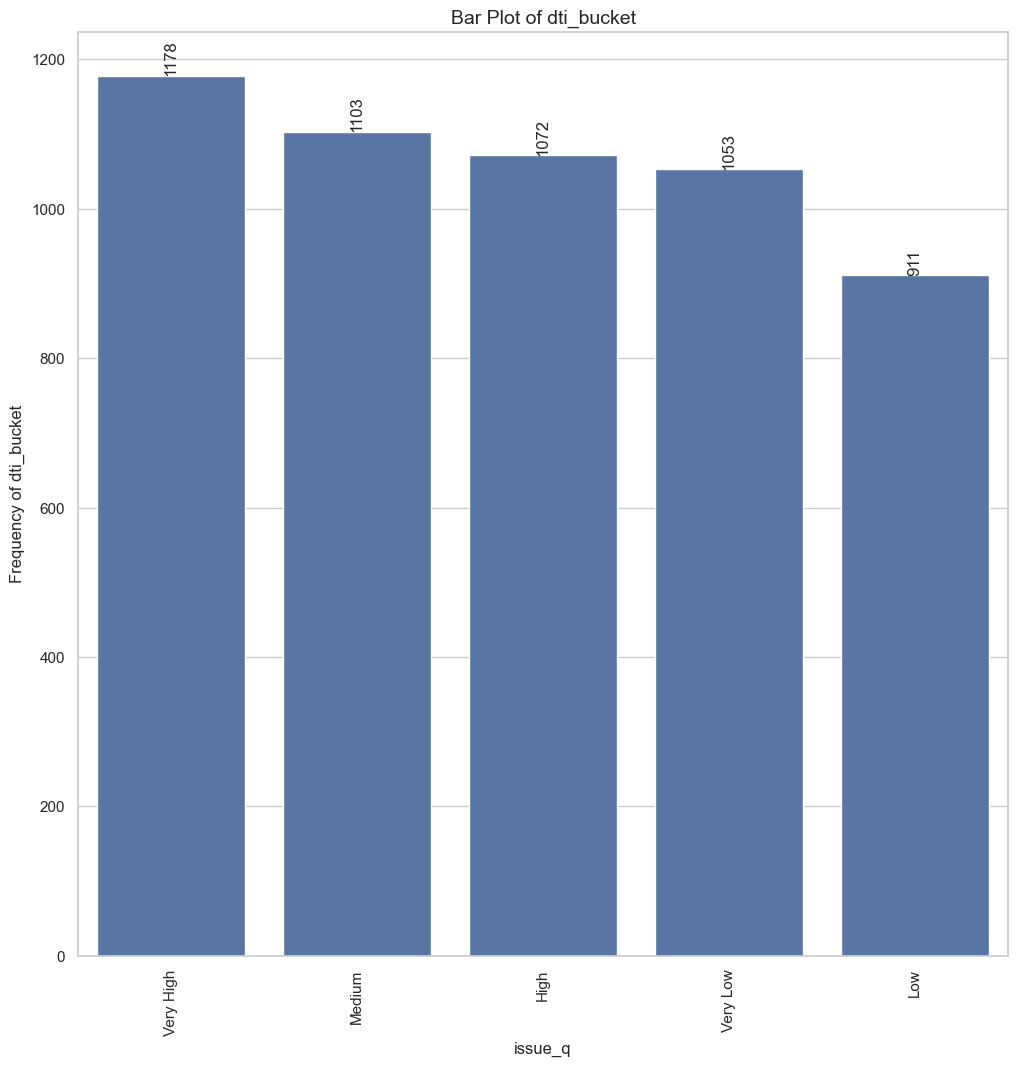

In [223]:
for quant_var in ['annual_inc_bucket', 'int_rate_bucket', 'loan_amnt_bucket', 'funded_amnt_bucket', 'dti_bucket']:
    plot_bar_graph(
        loan_df,
        x_column = quant_var,
        y_column = quant_var,
        title = f'Bar Plot of {quant_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {quant_var}',
        figsize=(12, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

In [225]:
installments_df = loan_df[loan_df.loan_paid == 'No']

In [227]:
def plot_histogram(data, column, bins=10, title=None, xlabel=None, ylabel=None, figsize=(8, 6)):
    # Set the style
    sns.set(style="whitegrid")

    # Create the histogram
    plt.figure(figsize=figsize)
    sns.histplot(data=data, x=column, bins=bins, kde=True)

    # Set title and labels
    if title:
        plt.title(title, fontsize=14)
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    # Show the plot
    plt.show()

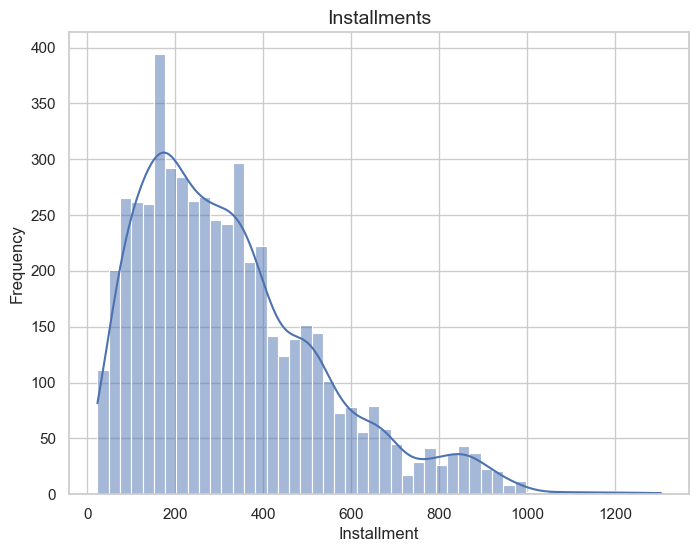

In [229]:
plot_histogram(installments_df, column='installment', bins=50, title='Installments', xlabel='Installment', ylabel='Frequency')